In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
from prml.utils.datasets import ClassificationDataGenerator2
from prml.sparse_kernel_machines import SupportVectorMachineClassifier


In [2]:
def f(x):
    return x*x*x - 3*x

# Support Vector Machine 

In [3]:
gen = ClassificationDataGenerator2(f)
n_data = 200
X_tr,y_tr = gen(encoding="label",x_lower=-3,x_upper=3,y_lower=-3,y_upper=3,n=n_data)  

svm = SupportVectorMachineClassifier(C=100.0,kernel="Gaussian",sigma=0.5)
svm.fit(X_tr,y_tr)

cmap = ListedColormap(["red","blue"])

# prepare data 
x_min,y_min = X_tr.min(axis = 0)
x_max,y_max = X_tr.max(axis = 0) 
x_min,y_min = x_min-0.1,y_min-0.1
x_max,y_max = x_max+0.1,y_max+0.1
x = np.linspace(x_min,x_max,100)
y = np.linspace(y_min,y_max,100) 
xs,ys = np.meshgrid(x,y)

# predict 
labels = svm.predict(np.array([xs.ravel(),ys.ravel()]).T)
labels = labels.reshape(xs.shape)

number of support vector 57
number of data 200


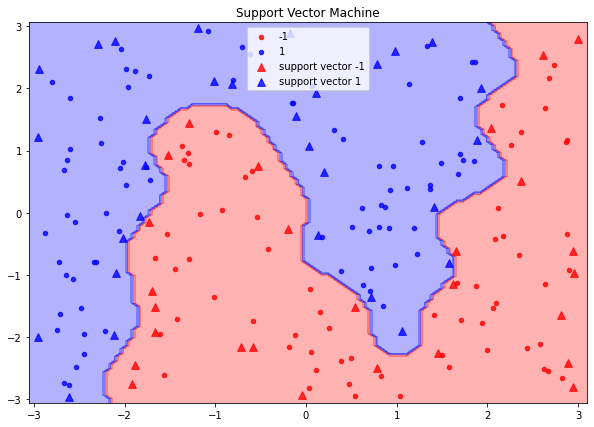

In [4]:
# plot 
figure,axes = plt.subplots(1,1,figsize=(10,7))
axes.contourf(xs,ys,labels,alpha=0.3,cmap=cmap)
axes.set_xlim(x_min,x_max)
axes.set_ylim(y_min,y_max)

ind_support_vector = svm.index_of_support_vector() 
not_support_vector = np.logical_not(np.isin(np.arange(n_data),ind_support_vector))
X_notsv,y_notsv = X_tr[not_support_vector],y_tr[not_support_vector]
X_sv,y_sv = X_tr[ind_support_vector],y_tr[ind_support_vector] 
axes.scatter(x=X_notsv[y_notsv == -1,0],y=X_notsv[y_notsv == -1,1],alpha=0.8,c="red",label=-1,s=20)
axes.scatter(x=X_notsv[y_notsv == 1,0],y=X_notsv[y_notsv == 1,1],alpha=0.8,c="blue",label=1,s=20)

axes.scatter(x=X_sv[y_sv == -1,0],y=X_sv[y_sv == -1,1],alpha=0.8,c="red",label=f"support vector {-1}",marker="^",s=60)
axes.scatter(x=X_sv[y_sv == 1,0],y=X_sv[y_sv == 1,1],alpha=0.8,c="blue",label=f"support vector {1}",marker="^",s=60)

print(f"number of support vector {svm.number_of_support_vector()}")
print(f"number of data {n_data}")

axes.set_title("Support Vector Machine")
plt.legend()
plt.show()